## Practice Case #5
# Data Analysis
# [Analyzing Ritz-Jager Hotel Data]

Arranged by **Rezki Hadiansah**

I’ve landed a great job with the Ritz-Jager Hotel operator as a data scientist. This hotel operator wants to improve their business efficiency by utilizing their historical data and they want to find out what happened in their previous bookings, knowing their customer better, and optimizing the promo timing.

My team of engineer have to analyze the data that they have based on the pre-defined questions that my CEO gave. 

**Questions:**

1. Where do the guests come from?
2. How much do guests pay for a room per night?
3. How does the price per night vary over the year?
4. Which are the busiest months?
5. How long do people stay at the hotels?
6. Bookings by market segment
7. How many bookings were cancelled?
8. Which month has the highest number of cancellations?

In [1]:
#Import the package

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pycountry

### Explore the Data first

In [2]:
df= pd.read_csv("Ritz_Jager_Data.csv")
df.head()

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


There are **32 features**. Next, we will do preprocessing data, such as handling outlier and missing value, drop features, etc.

## A. Preprocessing

### Check Data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel_type                      119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal_type       

From here, we can see, the data contains 18 numeric features and 14 categorical features. For the description of features, you can see the **"data_dictionary_Ritz_Jager.xlsx"** below:

In [4]:
desc=pd.read_excel("data_dictionary_Ritz_Jager.xlsx", index_col=None)
pd.set_option('display.max_colwidth', 0)
desc.head(32)

,Column Name,Definition
0,hotel_type,"Types of the hotel, Resort Hotel, or City Hotel"
1,is_canceled,The value indicating if the booking was cancelled (1) or not (0)
2,lead_time,Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
3,arrival_date_year,Year of arrival date
4,arrival_date_month,The month of arrival date
5,arrival_date_week_number,Week number of year for arrival date
6,arrival_date_day_of_month,Day of arrival date
7,stays_in_weekend_nights,Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
8,stays_in_week_nights,Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel
9,adults,Number of adults


### Handling Missing Value.

In [5]:
def Count_Miss(data,head):
    miss=data.isnull().sum()
    percent_miss=(miss/data.shape[0]*100)
    #Create Missing Value table
    NaN_Count=pd.concat([miss, percent_miss], axis=1)
    print('Sorted in descending....\n')
    a=NaN_Count.sort_values(ascending=False, by=1).head(head)
    return a
Count_Miss(df,5)

Sorted in descending....



,0,1
company,112593,94.306893
agent,16340,13.686238
country_origin,488,0.408744
children,4,0.003350
reserved_room_type,0,0.000000


From the table above, we can see that:
1. **company** column has the highest missing value, we can't do imputation for this feature. So, we will drop it.

In [6]:
df=df.drop(['company'], axis=1)
Count_Miss(df,5)

Sorted in descending....



,0,1
agent,16340,13.686238
country_origin,488,0.408744
children,4,0.003350
hotel_type,0,0.000000
previous_cancellations,0,0.000000


2. Next, **agent** column (Discrete) has 16340 (13.7%) missing value. We will see all values of this feature first. From this result below, we can see that **agent** has 334 unique values. In my opinion, we can still imputate 13.7% missing value of **agent**. I will imputate missing values with mode because **agent** is Discrete type data. The mode of this feature is **9.0**

In [7]:
df['agent'].value_counts(ascending=True)

337.0    1    
367.0    1    
197.0    1    
433.0    1    
213.0    1    
        ..    
7.0      3539 
14.0     3640 
1.0      7191 
240.0    13922
9.0      31961
Name: agent, Length: 333, dtype: int64

In [8]:
df['agent']=df['agent'].fillna(9.0)
Count_Miss(df,5)

Sorted in descending....



,0,1
country_origin,488,0.408744
children,4,0.003350
hotel_type,0,0.000000
previous_cancellations,0,0.000000
reservation_status,0,0.000000


3.  Next, **country_origin** has 0.4% (488) missing values. In my opinion, missing value comes because the guest didn't write the country from. So, we can fill that with "unknown".

In [9]:
df['country_origin']=df['country_origin'].fillna('Unknown')
Count_Miss(df,3)

Sorted in descending....



,0,1
children,4,0.00335
hotel_type,0,0.00000
is_repeated_guest,0,0.00000


4. Last is **children**. We will replace the NaN with the mode. The mode of this feature is 0. The reason is same as **agent** case.

In [10]:
df['children'].value_counts()
df['children']=df['children'].fillna(0)
Count_Miss(df,None)

Sorted in descending....



,0,1
hotel_type,0,0.0
is_repeated_guest,0,0.0
reservation_status,0,0.0
total_of_special_requests,0,0.0
required_car_parking_spaces,0,0.0
adr,0,0.0
customer_type,0,0.0
days_in_waiting_list,0,0.0
agent,0,0.0
deposit_type,0,0.0


There is no more missing value.

# Explanatory Data Analysis (EDA)
## Q1: Where do the guests come from?

We just only analyze guests that **didn't cancel the booking** and **not repeated guest**. This is the answer:


This is bar chart of customers who cancel or not the booking

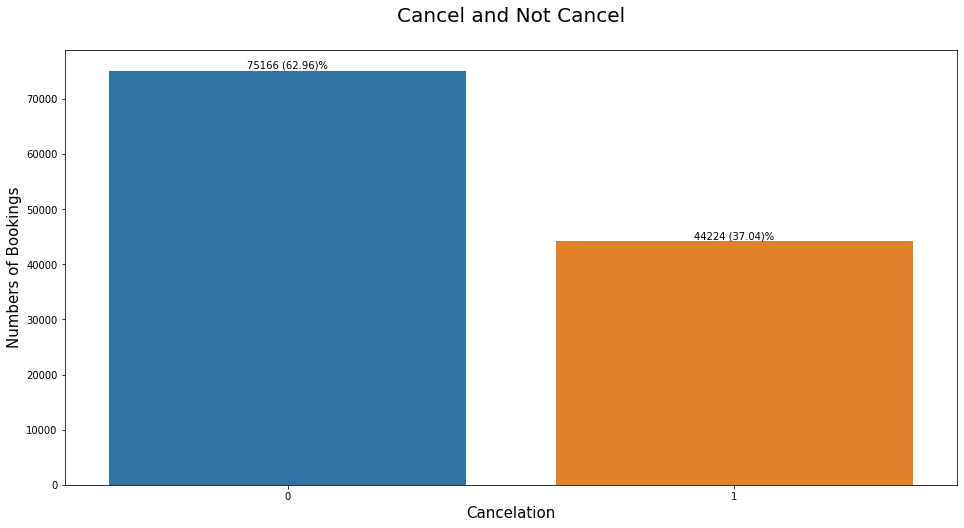

In [11]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)
ax = sns.countplot(df.is_canceled)
plt.title("Cancel and Not Cancel\n",fontdict={'fontsize':20})
plt.ylabel("Numbers of Bookings",fontdict={'fontsize':15})
plt.xlabel("Cancelation",fontdict={'fontsize':15})
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{} ({:.2f})%'.format(int(y),y*100/len(df)),(x.mean(),y), ha="center", va="bottom");

#### Creating new dataframe with condition above.

In [12]:
#Remove guest who cancel the booking
NoCancel= df[df['is_canceled']==0]
#Remove repeated guest
NoCancel= NoCancel[NoCancel['is_repeated_guest']==0]
print('(row, column) of the data \nBefore : ', df.shape, '\nAfter : ', NoCancel.shape)

(row, column) of the data 
Before :  (119390, 31) 
After :  (71908, 31)


Country of the data is in index form. So, we need change it to name country with modul **pycountry**

In [13]:
list_country = [i.alpha_3 for i in list(pycountry.countries)]
def convert_country(NoCancel):
    try:
        return pycountry.countries.get(alpha_3=NoCancel['country_origin']).name
    except:
        return "Not Recognize"
    
NoCancel["country_origin"] = NoCancel.apply(convert_country,axis=1)

In [14]:
#Total Country
print('Total Country in this data set is {}'
      .format(len(NoCancel["country_origin"].unique())))

Total Country in this data set is 164


#### This is the list of all country where all guests from.

In [15]:
#List the country data
list_country=pd.DataFrame(NoCancel["country_origin"].value_counts()).reset_index()
list_country.rename(columns={"index": "Country From", 
                             "country_origin":"Total Guests"}, inplace=True)
list_country['Percentage']=round(list_country['Total Guests']*100/NoCancel.shape[0])

pd.set_option('display.max_rows', None)
list_country.head(164)

,Country From,Total Guests,Percentage
0,Portugal,18347,26.0
1,United Kingdom,9570,13.0
2,France,8409,12.0
3,Spain,6307,9.0
4,Germany,6044,8.0
5,Ireland,2514,3.0
6,Italy,2395,3.0
7,Belgium,1852,3.0
8,Netherlands,1697,2.0
9,United States,1578,2.0


#### This is Top 10 Country with most Guests in All Hotel

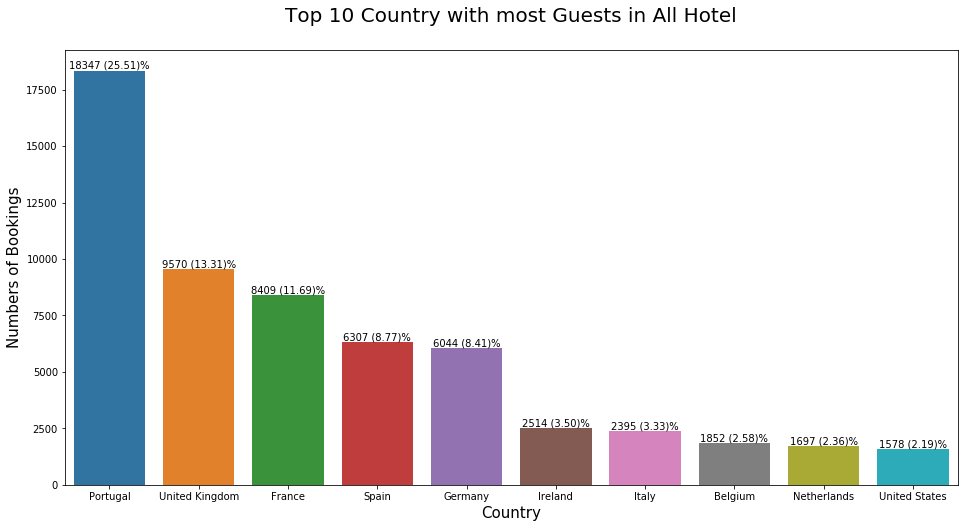

In [16]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)
Top10=list_country[:10]
ax = sns.barplot(x=Top10['Country From'] , y=Top10['Total Guests'])
plt.title("Top 10 Country with most Guests in All Hotel\n",fontdict={'fontsize':20})
plt.ylabel("Numbers of Bookings",fontdict={'fontsize':15})
plt.xlabel("Country",fontdict={'fontsize':15})

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{} ({:.2f})%'.format(int(y),y*100/len(NoCancel)),(x.mean(),y), ha="center", va="bottom");

## Q2: How much do guests pay for a room per night?

In [17]:
pd.DataFrame(df.adr.describe()).reset_index()

,index,adr
0,count,119390.000000
1,mean,101.831122
2,std,50.535790
3,min,-6.380000
4,25%,69.290000
5,50%,94.575000
6,75%,126.000000
7,max,5400.000000


From the table, we can see that there are strange adr showed in the data. There are guests where adr is <0 **(You can see the minimum is -6.38$)**.

So, for this case. I will drop the guests who have **adr<0** and use mean

##### In this case, I only show the guests who not cancel the booking, and show average payment of every guest group by hotel_type

In [18]:
allhotel=df[(df['is_canceled'] == 0) & (df.adr > 0) ]
city_hotel = df[(df['hotel_type']=='City Hotel') & (df['is_canceled'] == 0) & (df.adr > 0) ]
resort_hotel = df[(df['hotel_type']=='Resort Hotel') & (df['is_canceled'] == 0 & (df.adr > 0))]

#Average payment
print('Average Price (all type hotel and room) is ${}'.format(df.adr.mean()))
print('Average Price: City Hotel (all type room) is ${}'.format(city_hotel.adr.mean()))
print('Average Price: Resort Hotel (all type room) is ${}\n'.format(resort_hotel.adr.mean()))

room_city = city_hotel.groupby('assigned_room_type')['adr'].mean().reset_index()
print('Average price for each room type of city hotel type:')
x = room_city.apply(lambda x: print('Room type {}: ${}'.format(x[0],round(x[1],1))),axis = 1)
print('\n')
print('Average price for each room type of resort hotel type:')
room_resort = resort_hotel.groupby('assigned_room_type')['adr'].mean().reset_index()
x = room_resort.apply(lambda x: print('Room type {}: ${}'.format(x[0],round(x[1],1))),axis = 1)

Average Price (all type hotel and room) is $101.83112153446453
Average Price: City Hotel (all type room) is $108.27313340272732
Average Price: Resort Hotel (all type room) is $90.78897055774631

Average price for each room type of city hotel type:
Room type A: $99.1
Room type B: $97.5
Room type C: $110.4
Room type D: $117.9
Room type E: $142.2
Room type F: $178.2
Room type G: $196.8
Room type K: $102.1


Average price for each room type of resort hotel type:
Room type A: $80.1
Room type B: $102.3
Room type C: $107.1
Room type D: $81.3
Room type E: $101.0
Room type F: $117.3
Room type G: $148.8
Room type H: $158.0
Room type I: $40.1


## Q3: How does the price per night vary over the year?

In this case, I will only choose the data with adr>0 and no cancel booking. Because, in my opinion (just like what I mention in previous question) the guest with adr<0 is an exception.

##### To prevent failure when dividing adr with total guest, I will remove "zero value" guest

In [19]:
NoZeroNoCancel = NoCancel[(NoCancel.loc[:,'adults'] > 0) & 
                          (NoCancel.loc[:,'children'] > 0)]

#Create new feature [Total Guests]
NoZeroNoCancel.loc[:,'total guests'] = NoZeroNoCancel.loc[:,'adults'] + NoZeroNoCancel.loc[:,'children']

#Create new feature [Guest Pay]
NoZeroNoCancel.loc[:,'guests pay'] = NoZeroNoCancel.loc[:,'adr'] / NoZeroNoCancel.loc[:,'total guests']

#Separate by type hotel

ZC_resort = NoZeroNoCancel[NoZeroNoCancel.loc[:,'hotel_type'] == 'Resort Hotel']
ZC_city = NoZeroNoCancel[NoZeroNoCancel.loc[:,'hotel_type'] == 'City Hotel']

C:\Users\Rezki Hadiansah\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Rezki Hadiansah\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


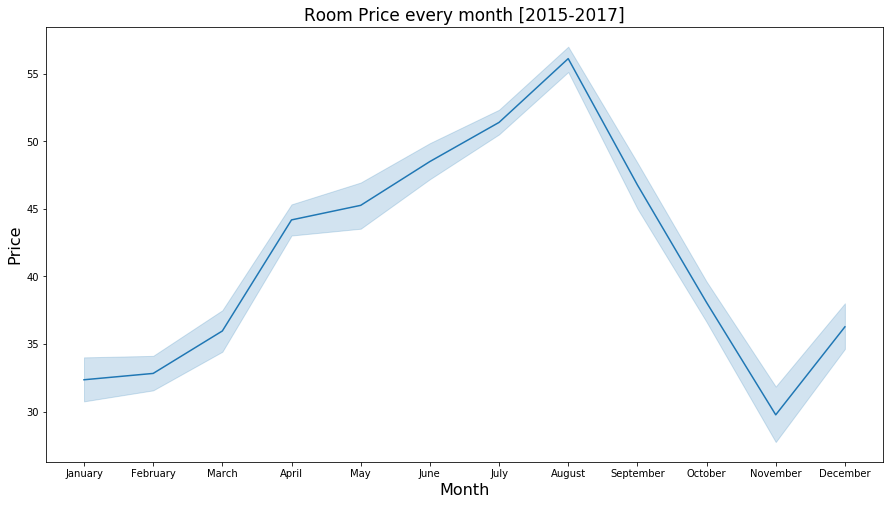

In [20]:
PerMonth = NoZeroNoCancel.loc[:,['hotel_type','arrival_date_month','guests pay']]

#Sort the month
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

PerMonth.loc[:,'arrival_date_month'] = pd.Categorical(PerMonth.loc[:,'arrival_date_month'], categories=months)

#plot the data
plt.figure(figsize=(15, 8))
sns.lineplot(x = "arrival_date_month", y="guests pay", data=PerMonth)
plt.title("Room Price every month [2015-2017]", fontsize=17)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

1. From the plot above we can conclude that the price in All Hotel were always increasing until **August**. And then, the price is decreasing by time. In my opinion, this is happend because August is the end of summer season.
2. The decreasing was going until November, then increasing again. In my opinion, this is happend because November is the end of winter season

##### Now, we will see the plot group by the type of hotel

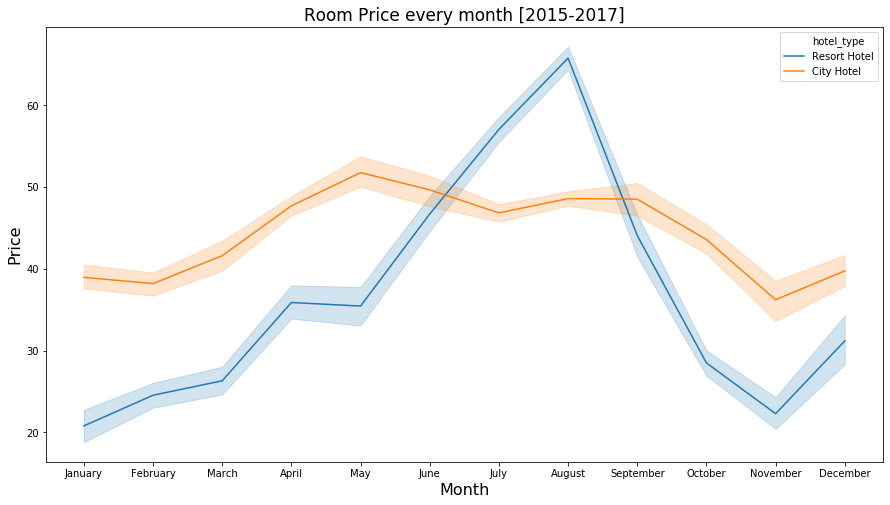

In [21]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = "arrival_date_month", y="guests pay",hue='hotel_type', data=PerMonth, hue_order = ["Resort Hotel", "City Hotel"])
plt.title("Room Price every month [2015-2017]", fontsize=17)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

From the line chart above, we can conclude that City Hotel has less price than Resort Hotel in August. It is obvious because lots of people go vacation in the start of summer not to City but to Resort.

## Q4: Which are the busiest months?

#### First, we will check the busiest month for All Hotel

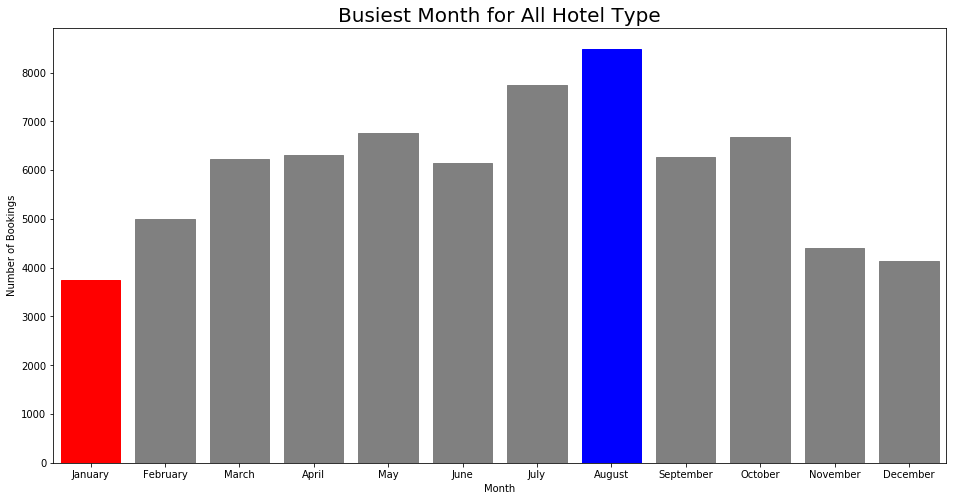

In [22]:
#Create Plot
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)
ax = sns.countplot(NoCancel.arrival_date_month, order=months)
plt.ylabel("Number of Bookings")
plt.xlabel("Month")
plt.title("Busiest Month for All Hotel Type",fontdict={'fontsize':20})

countmonth=NoCancel.arrival_date_month.value_counts()
for p in ax.patches:
    if p.get_bbox().get_points()[1,1]== max(countmonth):
        p.set_color('blue')
    elif p.get_bbox().get_points()[1,1]== min(countmonth):
        p.set_color('red')
    else:
        p.set_color('grey');

In [23]:
print('August was the busiest month overall year 2015-2017 with total booking:\n', countmonth[0])

August was the busiest month overall year 2015-2017 with total booking:
 8490


From the plot above, we get insight that Busiest Month is August for All hotels. Now we will see the busiest month for every type of hotel.

#### TypeHotel=City Hotel

In [24]:
NoCancel_CityHotel=NoCancel[NoCancel['hotel_type']=='City Hotel']

August was the busiest month overall year 2015-2017 with total booking:
 5310


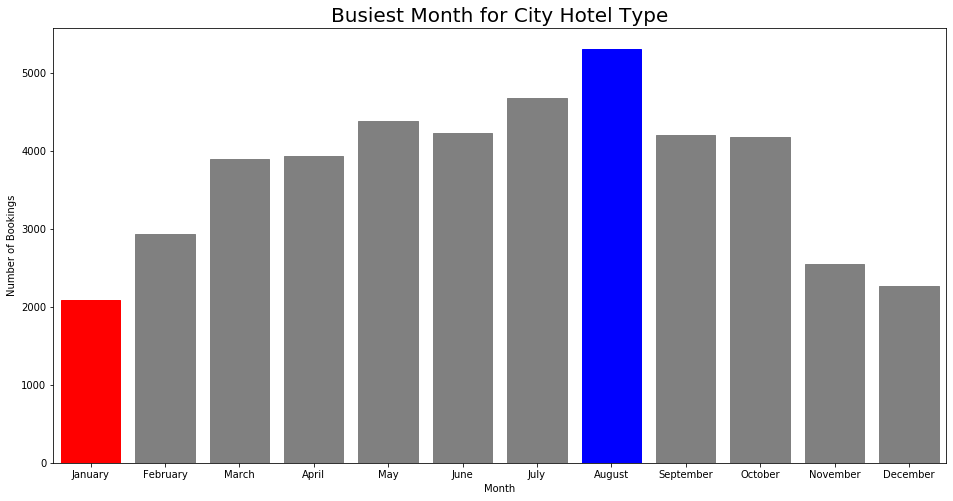

In [25]:
#Create Plot
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)
ax = sns.countplot(NoCancel_CityHotel.arrival_date_month, order=months)
plt.ylabel("Number of Bookings")
plt.xlabel("Month")
plt.title("Busiest Month for City Hotel Type",fontdict={'fontsize':20})

countmonth_city=NoCancel_CityHotel.arrival_date_month.value_counts()
for p in ax.patches:
    if p.get_bbox().get_points()[1,1]== max(countmonth_city):
        p.set_color('blue')
    elif p.get_bbox().get_points()[1,1]== min(countmonth_city):
        p.set_color('red')
    else:
        p.set_color('grey');
print('August was the busiest month overall year 2015-2017 with total booking:\n', countmonth_city[0])

From that plot, we got that for **City Hotel**, the busiest month is August with total 5310 booking

In [26]:
NoCancel_ResortHotel=NoCancel[NoCancel['hotel_type']=='Resort Hotel']

August was still the busiest month overall year 2015-2017 with total booking:
 3180


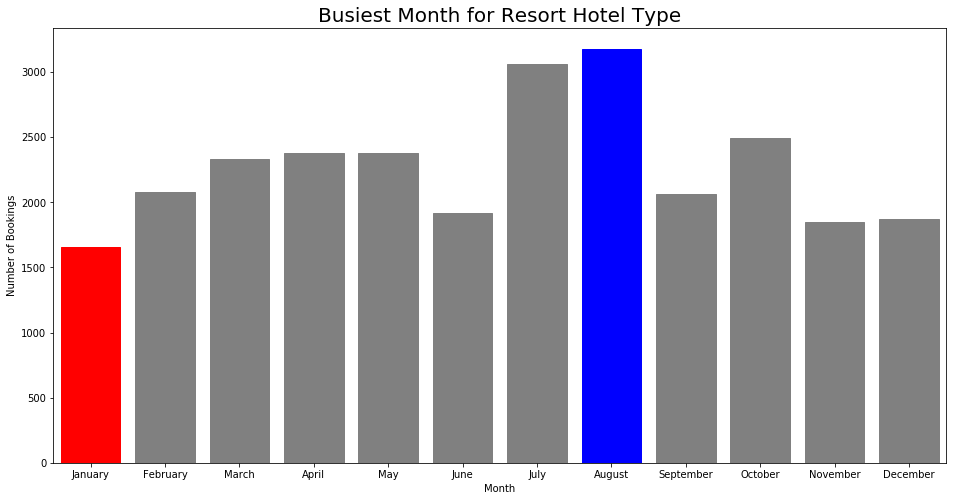

In [27]:
#Create Plot
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)
ax = sns.countplot(NoCancel_ResortHotel.arrival_date_month, order=months)
plt.ylabel("Number of Bookings")
plt.xlabel("Month")
plt.title("Busiest Month for Resort Hotel Type",fontdict={'fontsize':20})

countmonth_resort=NoCancel_ResortHotel.arrival_date_month.value_counts()
for p in ax.patches:
    if p.get_bbox().get_points()[1,1]== max(countmonth_resort):
        p.set_color('blue')
    elif p.get_bbox().get_points()[1,1]== min(countmonth_resort):
        p.set_color('red')
    else:
        p.set_color('grey');
print('August was still the busiest month overall year 2015-2017 with total booking:\n', 
      countmonth_resort[0])

## Q5: How long do people stay at the hotels?

In [28]:
#Make a function
A='All Hotel'
C='City Hotel'
R='Resort Hotel'
def avg_stay(data,hotel):
    num_night = []
    data.reset_index(inplace=True)
    data.drop(columns="index", inplace=True)
    for i in range(0,len(data)):
        weekend = data.loc[i,'stays_in_weekend_nights']
        week = data.loc[i,'stays_in_week_nights']
        total = weekend + week
        num_night.append(total)
    print("People stay at the hotel ({}) for an average of {} days.".format(hotel,int(np.mean(num_night))))

#### All Hotel

In [29]:
avg_stay(NoCancel,A)

People stay at the hotel (All Hotel) for an average of 3 days.


#### City Hotel

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
avg_stay(NoCancel_CityHotel,C)

People stay at the hotel (City Hotel) for an average of 2 days.


#### Resort Hotel

In [32]:
avg_stay(NoCancel_ResortHotel,R)

People stay at the hotel (Resort Hotel) for an average of 4 days.


## Q6: Booking by market segment

In this case, we will use the original cleaned version data (**df**). We want to know what market segment are most preferred by guest.

In [33]:
count_market_segment=df.market_segment.value_counts()

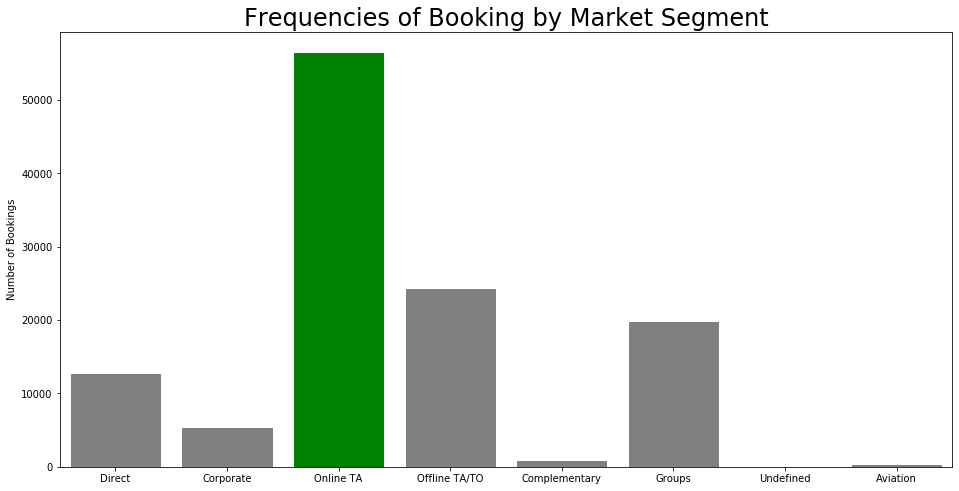

In [34]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)
ax = sns.countplot(df.market_segment)

plt.title("Frequencies of Booking by Market Segment", fontdict={'fontsize':24})
plt.xlabel("")
plt.ylabel("Number of Bookings")

for p in ax.patches:
    if p.get_bbox().get_points()[1,1]==max(count_market_segment):
        p.set_color('green')
    elif p.get_bbox().get_points()[1,1]== min(count_market_segment):
        p.set_color('red')
    else:
        p.set_color('grey');

In [35]:
print('Online TA has the highest total booking with {} total booking'
      .format(max(count_market_segment)))

Online TA has the highest total booking with 56477 total booking


## Q7: How many booking were canceled?

First, we divide the data between **City Hotel** and **Resort Hotel** from original cleaned data (**df**). 

In [36]:
resort_hotel = df[df['hotel_type']== 'Resort Hotel']
city_hotel = df[df['hotel_type'] == 'City Hotel']

To count total booking that were canceled, just count the shape of data

In [37]:
def CountCancel(data,type_hotel):
    total   = data[data['is_canceled']==1].shape[0]
    all     = data.shape[0]
    percent = round(total*100/all,2)
    print('Total Guests who cancelled their booking for {} is {} or {}% from {} total booking'
          .format(type_hotel,total, percent, all))

#### For All Hotel

In [38]:
CountCancel(df,A)

Total Guests who cancelled their booking for All Hotel is 44224 or 37.04% from 119390 total booking


#### For City Hotel

In [39]:
CountCancel(df,C)

Total Guests who cancelled their booking for City Hotel is 44224 or 37.04% from 119390 total booking


#### For Resort Hotel

In [40]:
CountCancel(df,R)

Total Guests who cancelled their booking for Resort Hotel is 44224 or 37.04% from 119390 total booking


## Q8: Which month has the highest number of cancellations?

For this case, we just need to count guests who did cancellation every month.

In [41]:
CancelAll=df[df['is_canceled']==1]
CancelCity=city_hotel[city_hotel['is_canceled']==1]
CancelResort=resort_hotel[resort_hotel['is_canceled']==1]

In [42]:
def Total_Cancel(Data,type_hotel):    
    fig,ax = plt.subplots()
    fig.set_size_inches(16, 8)
    ax = sns.countplot(Data.arrival_date_month, order=months)
    plt.ylabel("Number of Cancelled Bookings")
    plt.xlabel("Month")
    count_cancel=Data.arrival_date_month.value_counts()
    count_cancel_df=pd.DataFrame(count_cancel).reset_index()
    for p in ax.patches:
        if p.get_bbox().get_points()[1,1]==max(count_cancel):
            p.set_color('green')
        elif p.get_bbox().get_points()[1,1]== min(count_cancel):
            p.set_color('red')
        else:
            p.set_color('grey');
    print('{} is the month with highest of cancelation booking ({}) in 2015-2017 with total {} booking cancelations'
         .format(count_cancel_df.loc[0,'index'],type_hotel,max(count_cancel)))

### For All Hotel

August is the month with highest of cancelation booking (All Hotel) in 2015-2017 with total 5239 booking cancelations


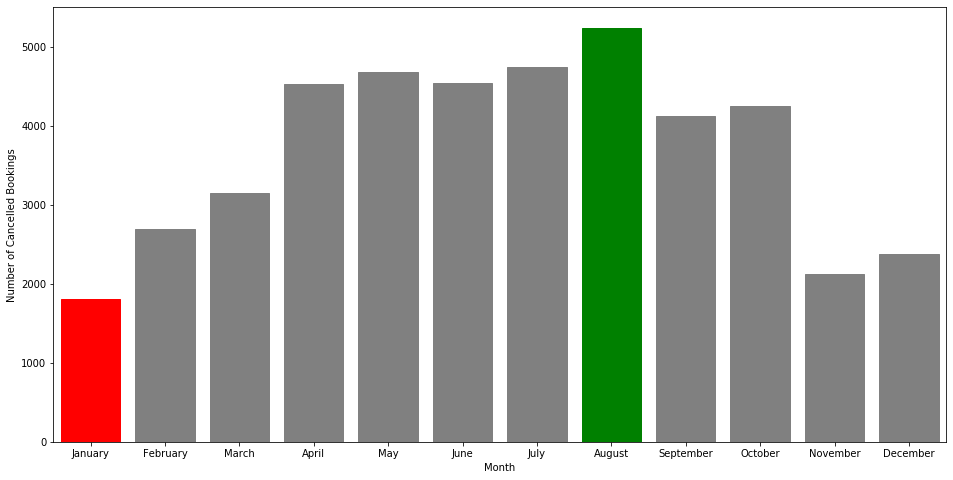

In [43]:
Total_Cancel(CancelAll,A)

### For City Hotel

May is the month with highest of cancelation booking (City Hotel) in 2015-2017 with total 3653 booking cancelations


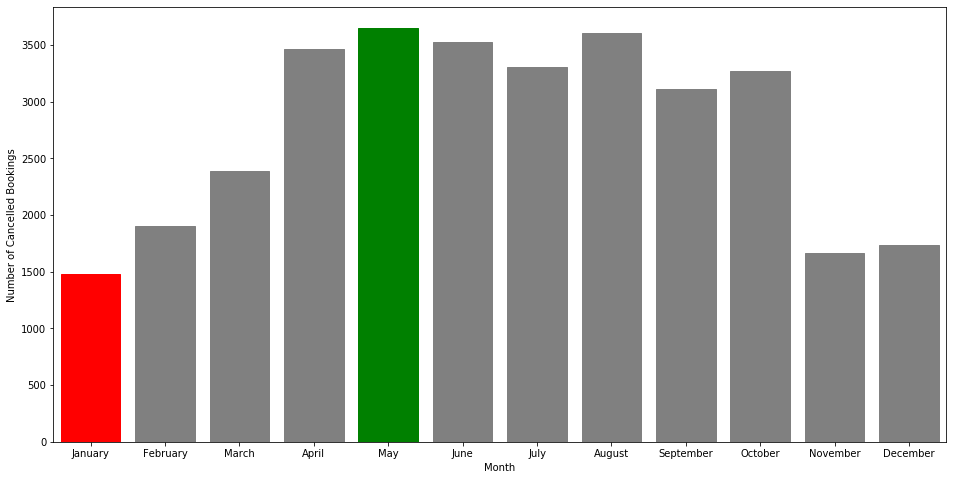

In [44]:
Total_Cancel(CancelCity,C)

### For Resort Hotel

August is the month with highest of cancelation booking (Resort Hotel) in 2015-2017 with total 1637 booking cancelations


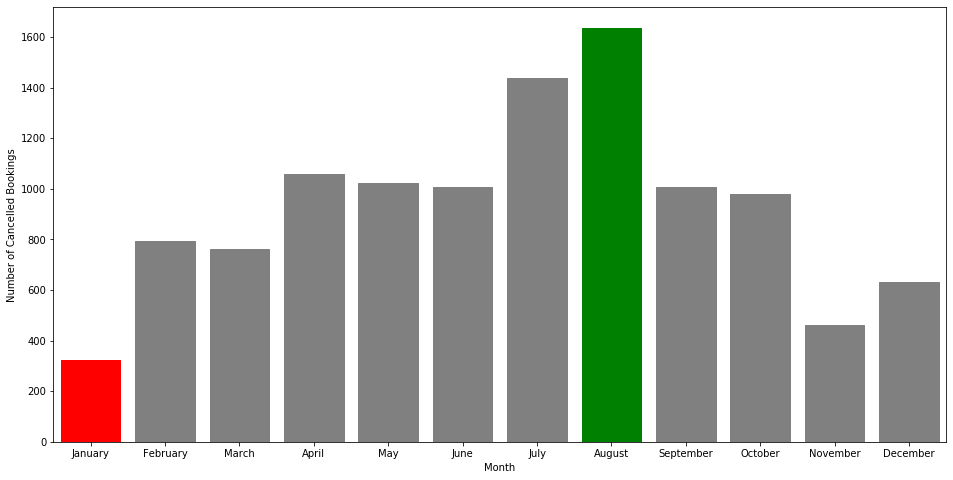

In [45]:
Total_Cancel(CancelResort,R)